In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use('seaborn')

/var/folders/x2/rycljrws2z3862lwtvx_2f9h0000gn/T/ipykernel_26891/4252424468.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
# Read in data
df = pd.read_csv('new_df.csv')
df.drop(columns='Unnamed: 0', inplace=True)

# Split review dates by year, month and day (strings)
time_split = df.review_date.str.split('/', n=2, expand=True)
time_split.head()
df['year'] = time_split[0]
df['month'] = time_split[1]
df['day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.review_date
df.review_date = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
df['month_year'] = pd.to_datetime(df['review_date']).dt.to_period('M')

/var/folders/x2/rycljrws2z3862lwtvx_2f9h0000gn/T/ipykernel_26891/3026881096.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.review_date = [d.date() for d in pd.to_datetime(dates)]


In [9]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

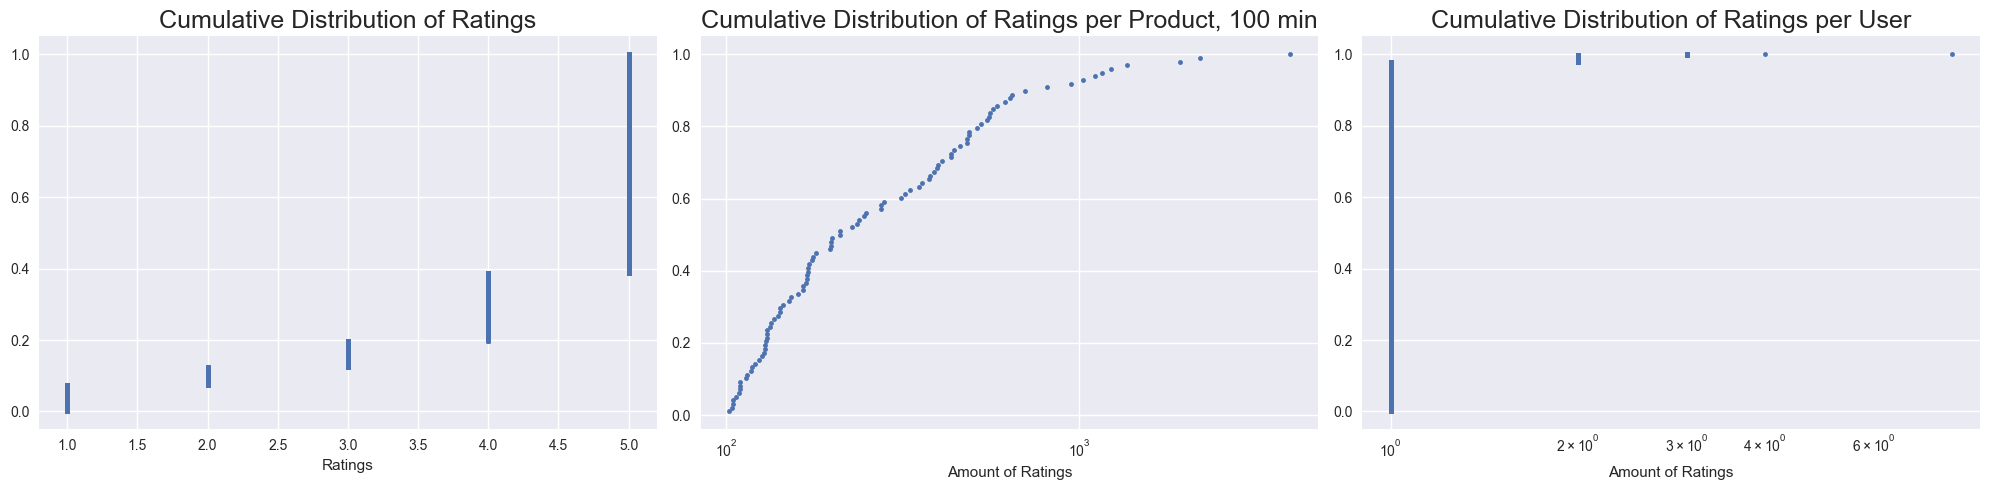

In [10]:
plt.figure(figsize=(20,5))

# Plot cumulative distribution of ratings
x, y = ecdf(df.star_rating)

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Ratings')
ax1.set_title('Cumulative Distribution of Ratings', fontsize=18)
plt.plot(x, y, marker='.', linestyle='none')


# Plot cumulative distribution of ratings per product, 100 minimum
x, y = ecdf(df.groupby('product_id').star_rating.count())

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Amount of Ratings')
ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Ratings per Product, 100 min', fontsize=18)


# Plot cumulative distribution of ratings per user
x, y = ecdf(df.groupby('customer_id').star_rating.count())

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Amount of Ratings')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Ratings per User', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

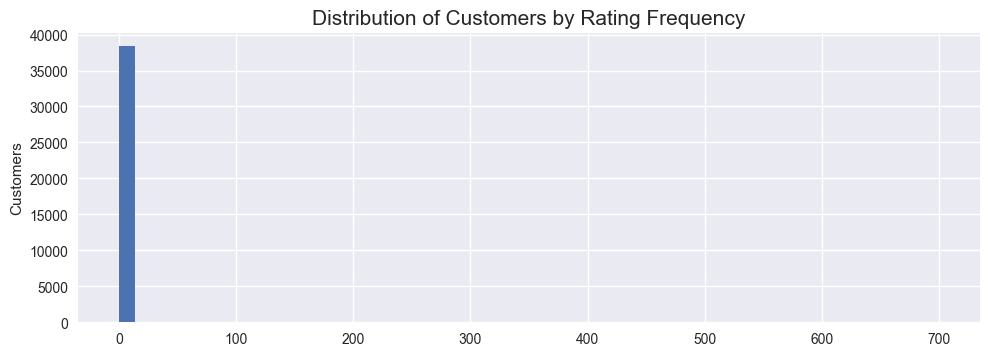

In [11]:
# Plot distribution of amount of ratings per user
plt.figure(figsize=(10,10))

ax1 = plt.subplot(3,1,1)


df.customer_id.value_counts().plot(kind='hist', bins=50, range=(0,700), ax=ax1)

ax1.set_title('Distribution of Customers by Rating Frequency', fontsize=15)
ax1.set_ylabel('Customers')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


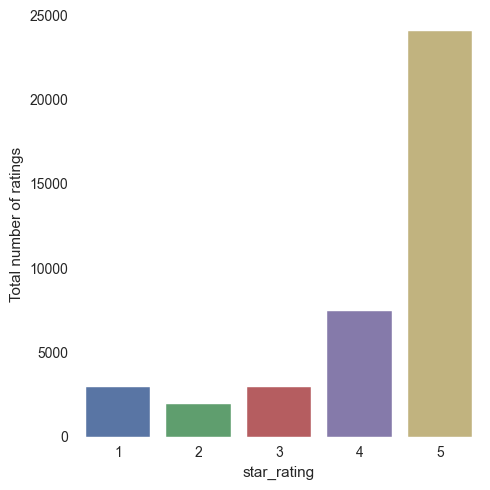

In [12]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot(x="star_rating", data=df, kind='count')
    g.set_ylabels("Total number of ratings")

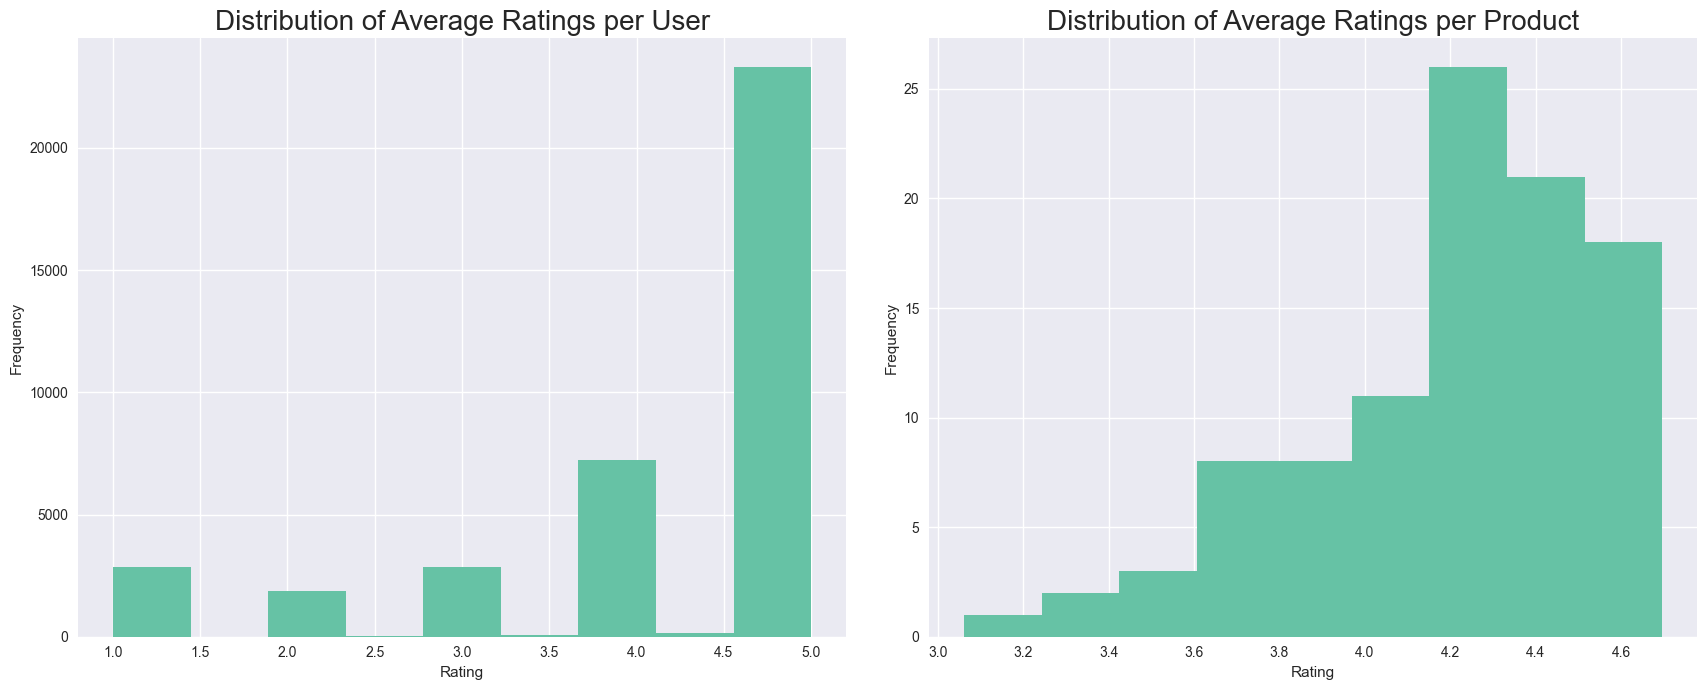

In [13]:
# Plot user distribution by average rating
plt.figure(figsize=(25,7))
custom_palette = sns.color_palette("Set2")

ax2 = plt.subplot(1,3,2)
df.groupby('customer_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax2,color=custom_palette)
ax2.set_title('Distribution of Average Ratings per User', fontsize=20)
ax2.set_xlabel('Rating')

# Plot distribution of overall ratings among products
ax3 = plt.subplot(1,3,3)
df.groupby('product_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax3,color=custom_palette)
ax3.set_title('Distribution of Average Ratings per Product', fontsize=20)
ax3.set_xlabel('Rating')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

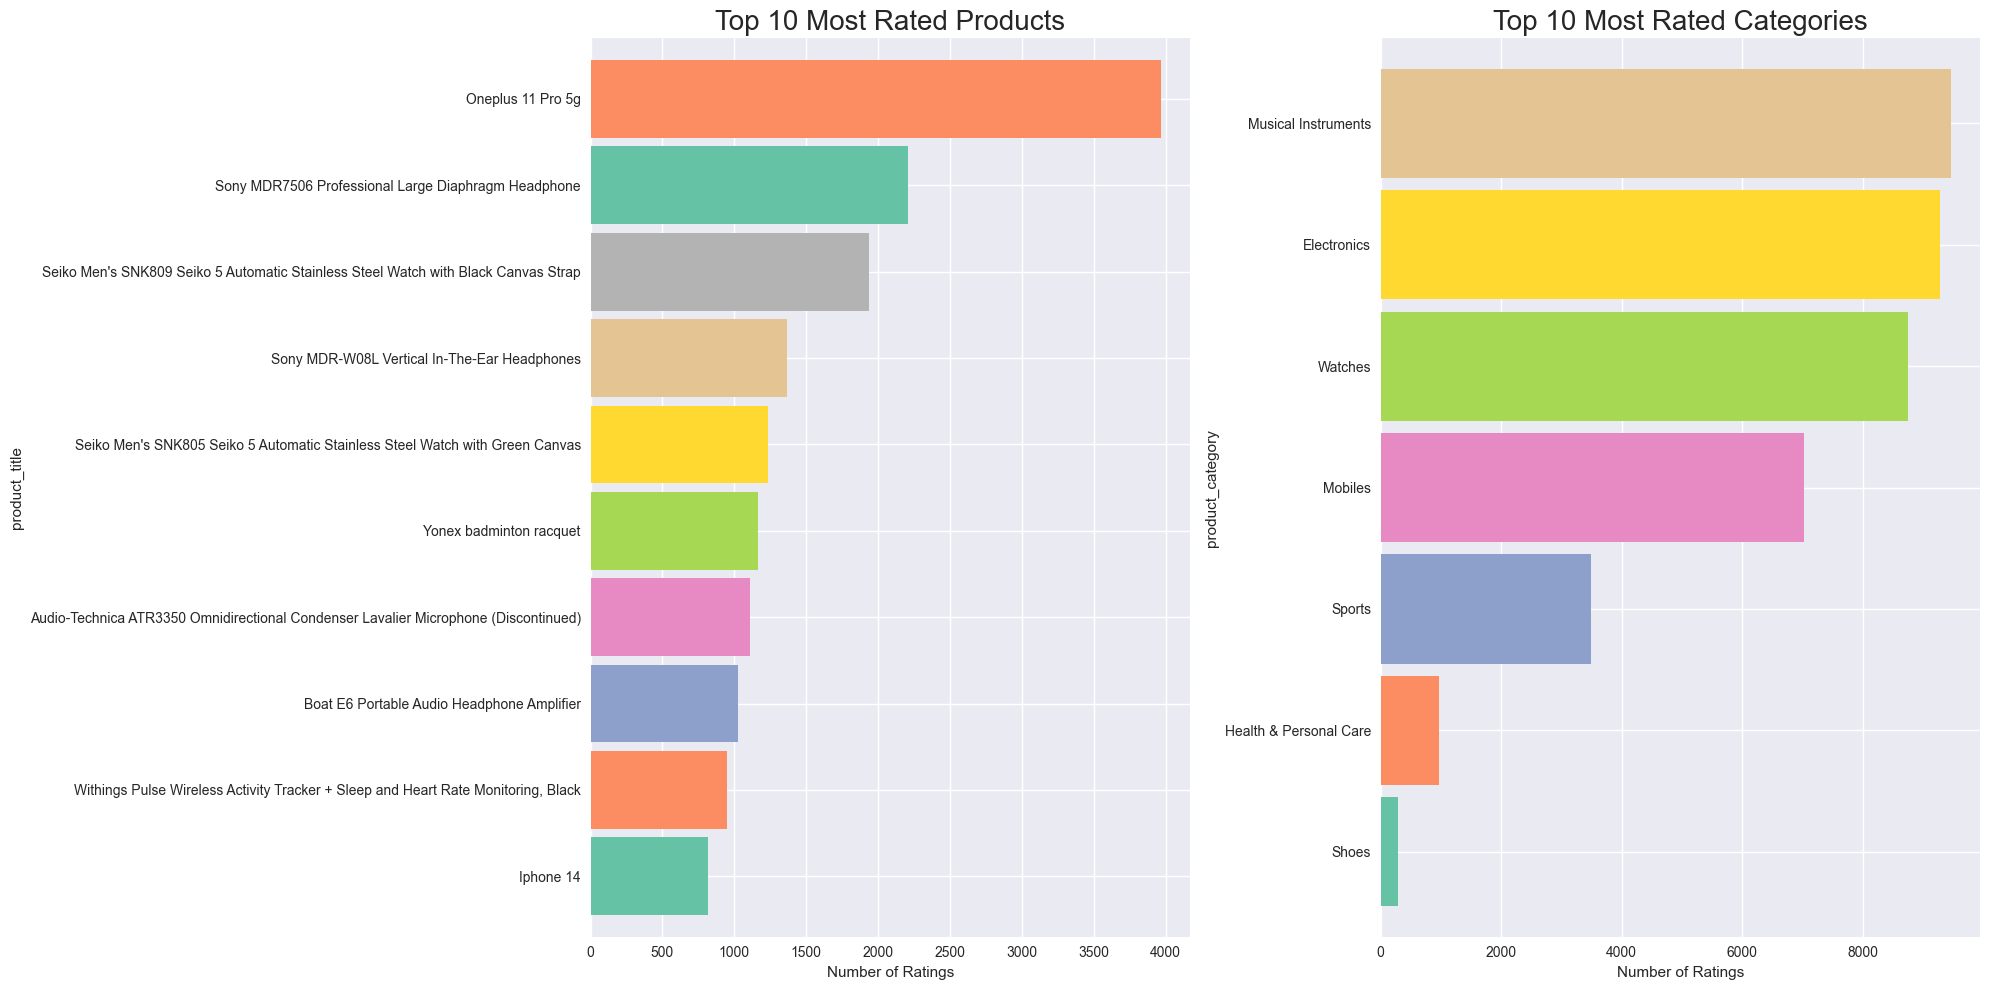

In [14]:
plt.figure(figsize=(20,10))
custom_palette = sns.color_palette("Set2")

# Plot 10 most common products purchased
ax1 = plt.subplot(1,2,1)
df.product_title.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax1,color=custom_palette)
ax1.set_xlabel('Number of Ratings')
ax1.set_title('Top 10 Most Rated Products', fontsize=20)

# Plot 10 most common categories purchased
ax2 = plt.subplot(1,2,2)
df.product_category.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2,color=custom_palette)
ax2.set_xlabel('Number of Ratings')
ax2.set_title('Top 10 Most Rated Categories', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [15]:
# Create list of top 6 categories
categories = list(df.product_category.value_counts().index[:6])

# Group dataset by product category and title and find the mean for star rating
top = df.groupby(['product_category', 'product_title','purchased_counts'])['star_rating'].mean().reset_index()

top.head()

,product_category,product_title,purchased_counts,star_rating
0,Electronics,AN-3DG20-B Rechargeable 3D Glasses for Use wit...,105,4.409524
1,Electronics,Barnes & Noble Nook Simple Touch eBook Reader ...,560,3.916071
2,Electronics,Boat D3 (D03K) Digital to Analog Audio Convert...,110,4.563636
3,Electronics,Boat E11 Portable Headphone Amplifier - E11,360,4.125000
4,Electronics,Boat E17 Alpen Portable Headphone Amplifier US...,280,4.303571


In [16]:

# Print the top 3 most rated products for each category
for category in categories:
    print('Top 3 Most Common Products Rated in {}'.format(category))
    print(top[top.product_category == category].
          nlargest(3, columns='purchased_counts')[['product_title', 'star_rating', 'purchased_counts']].
          set_index('product_title'))
    print('-------------------------------------')
    print('\n')

Top 3 Most Common Products Rated in Musical Instruments
                                                    star_rating  \
product_title                                                     
Sony MDR7506 Professional Large Diaphragm Headp...     4.640561   
Audio-Technica ATR3350 Omnidirectional Condense...     3.657942   
AKG M220 Pro Stylist Semi-Open High Definition ...     4.366873   

                                                    purchased_counts  
product_title                                                         
Sony MDR7506 Professional Large Diaphragm Headp...              2209  
Audio-Technica ATR3350 Omnidirectional Condense...              1108  
AKG M220 Pro Stylist Semi-Open High Definition ...               646  
-------------------------------------


Top 3 Most Common Products Rated in Electronics
                                              star_rating  purchased_counts
product_title                                                              
Sony MDR-W08L

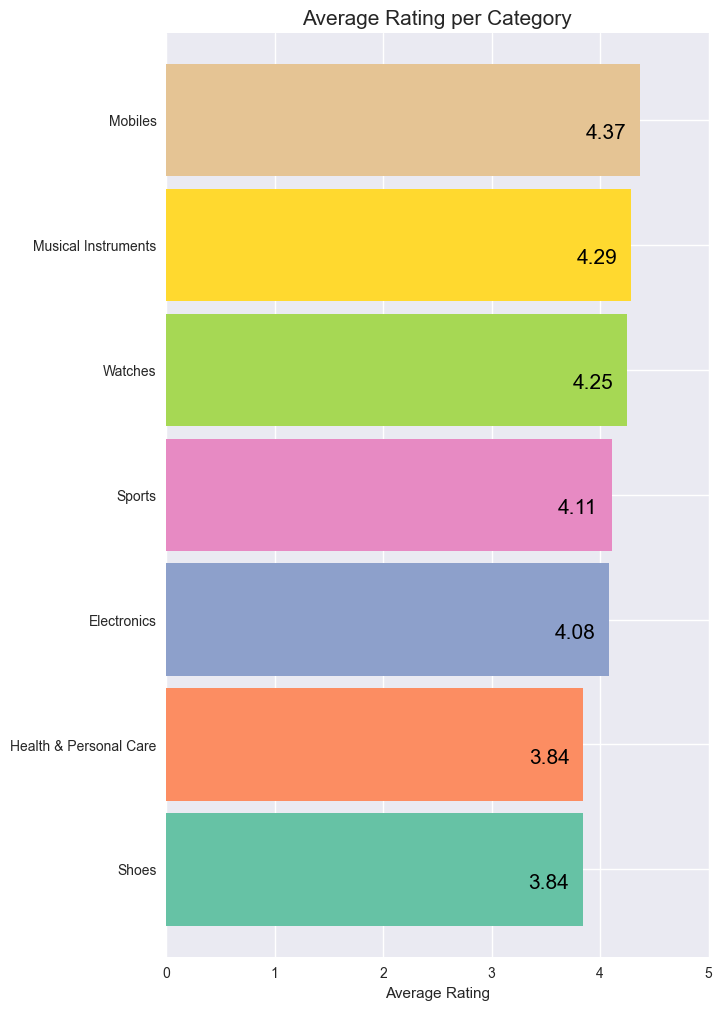

In [17]:
plt.figure(figsize=(7,12))

# Plot average rating by product category
custom_palette = sns.color_palette("Set2")
ax = df.groupby('product_category').star_rating.mean().sort_values().plot.barh(width=0.9,color=custom_palette)
ax.set_title('Average Rating per Category', fontsize=15)
ax.set_xlim(0, 5)
ax.set_ylabel('')
ax.set_xlabel('Average Rating')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

/var/folders/x2/rycljrws2z3862lwtvx_2f9h0000gn/T/ipykernel_26891/875051238.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])


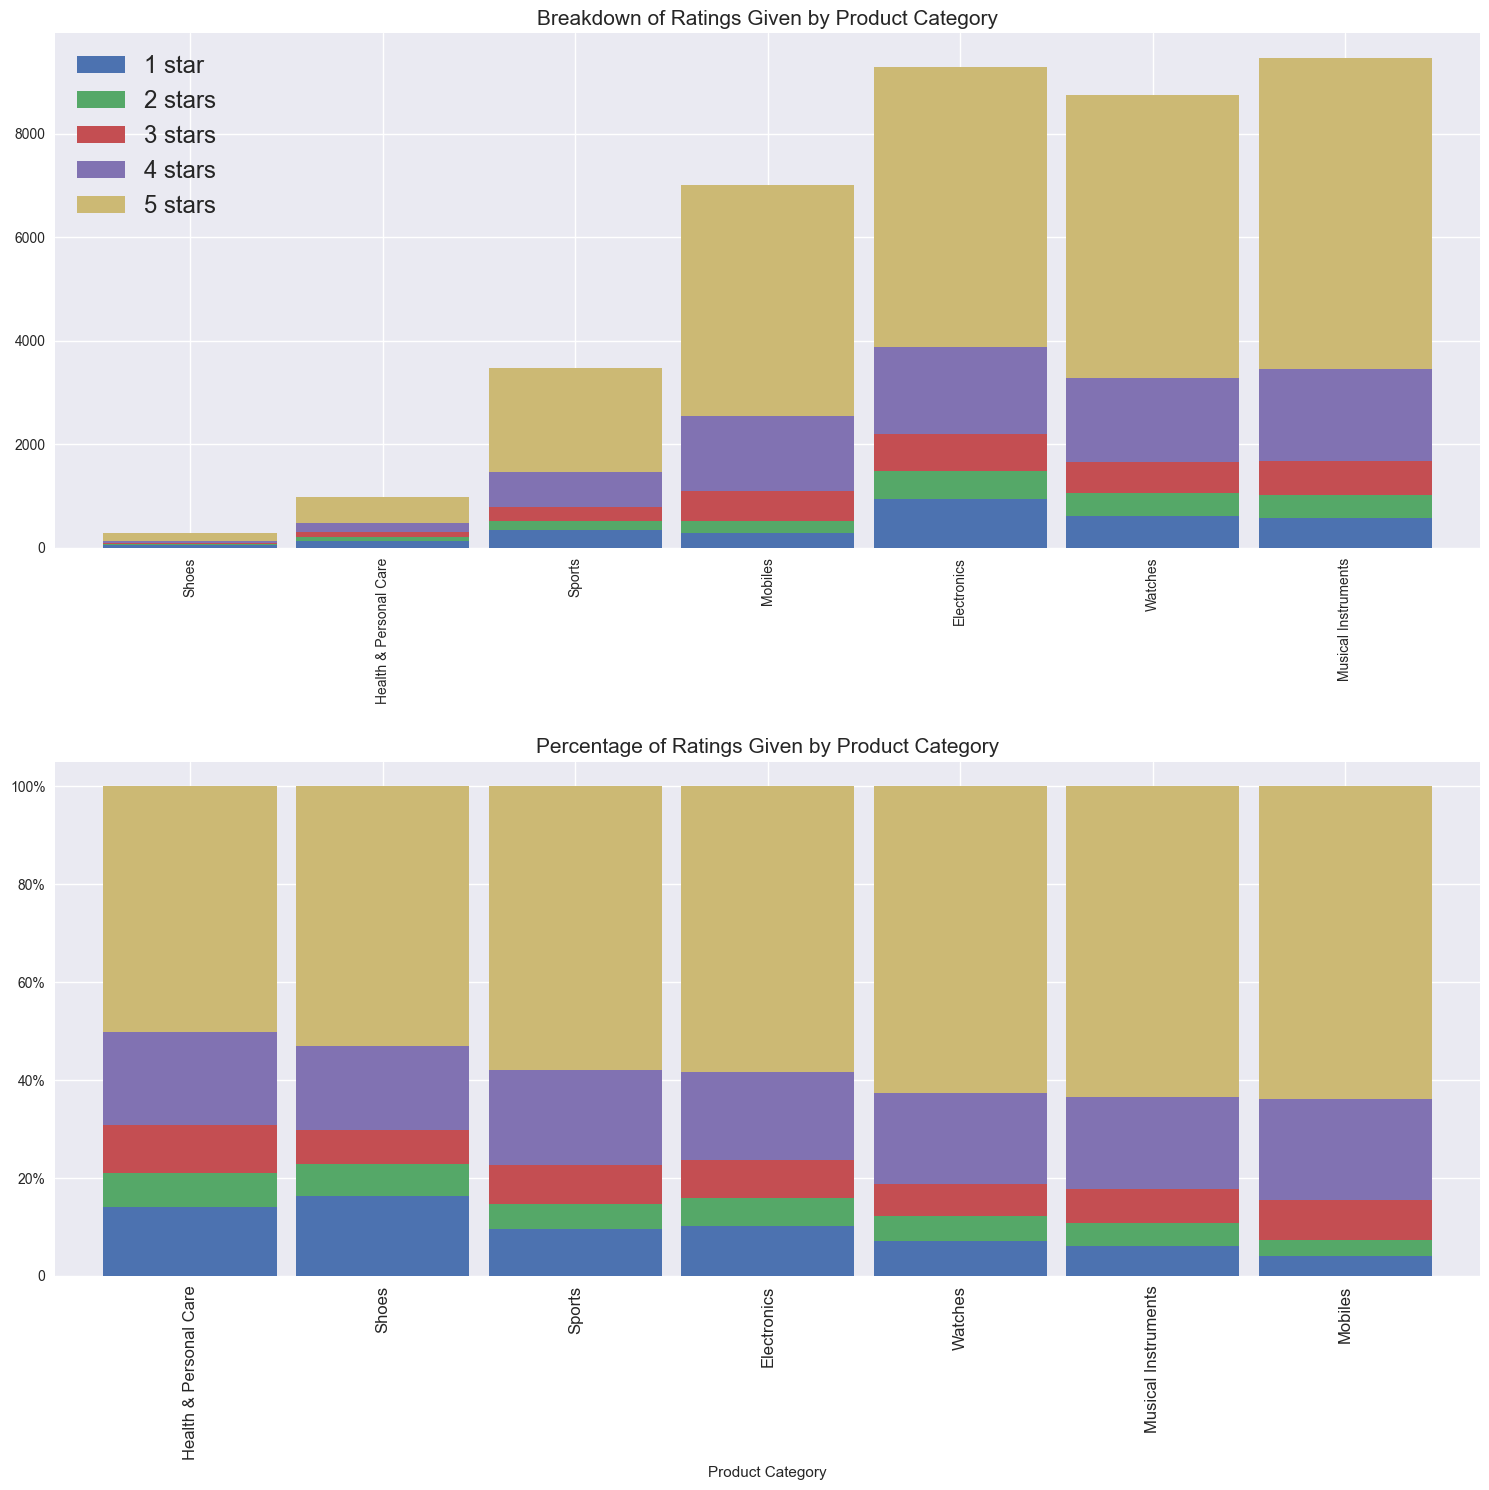

In [18]:
# Group dataset by product category and star ratings and count amount of ratings for each
grouped = df.groupby(['product_category', 'star_rating']).count().reset_index()

# Pivot dataset to display how many of each rating a product category received
g_pivot = grouped.pivot(index='product_category', columns='star_rating', values='customer_id')

plt.figure(figsize=(15,15))

# Plot breakdown of total ratings given by product category
ax1 = plt.subplot(2,1,1)
g_pivot.sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax1)
ax1.set_xlabel(' ')
ax1.set_title('Breakdown of Ratings Given by Product Category', fontsize=15)
ax1.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper left', fontsize='xx-large')

# Plot breakdown percentage of ratings given by product category
ax2 = plt.subplot(2,1,2)
g_pivot.loc[:,1.0:5.0].div(g_pivot.sum(axis=1), axis=0).sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Percentage of Ratings Given by Product Category', fontsize=15)
ax2.set_xlabel('Product Category')
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.legend().remove()
plt.xticks(fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()